<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/ionoshpere_CLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/sample_data/ionosphere.data')
df.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [3]:
df['g'].value_counts()

g    224
b    126
Name: g, dtype: int64

In [4]:
df['g'] = df['g'].apply(lambda x: 1 if x == 'g' else 0)
df.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0


In [5]:
df.isnull().sum()

1            0
0            0
0.99539      0
-0.05889     0
0.85243      0
0.02306      0
0.83398      0
-0.37708     0
1.1          0
0.03760      0
0.85243.1    0
-0.17755     0
0.59755      0
-0.44945     0
0.60536      0
-0.38223     0
0.84356      0
-0.38542     0
0.58212      0
-0.32192     0
0.56971      0
-0.29674     0
0.36946      0
-0.47357     0
0.56811      0
-0.51171     0
0.41078      0
-0.46168     0
0.21266      0
-0.34090     0
0.42267      0
-0.54487     0
0.18641      0
-0.45300     0
g            0
dtype: int64

In [6]:
df.shape

(350, 35)

In [7]:
X = df.drop('g', axis=1)
y = df['g']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
X.shape

(350, 34)

In [17]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [22]:
es = EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

In [24]:
hist = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[es]
)

Epoch 1/1000
1/1 [==============================] - 1s 780ms/step - loss: 0.6962 - binary_accuracy: 0.5286 - val_loss: 0.6762 - val_binary_accuracy: 0.7429
Epoch 2/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6945 - binary_accuracy: 0.6714 - val_loss: 0.6749 - val_binary_accuracy: 0.7429
Epoch 3/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6929 - binary_accuracy: 0.6750 - val_loss: 0.6736 - val_binary_accuracy: 0.7571
Epoch 4/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6912 - binary_accuracy: 0.6750 - val_loss: 0.6723 - val_binary_accuracy: 0.7571
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6895 - binary_accuracy: 0.6750 - val_loss: 0.6710 - val_binary_accuracy: 0.7571
Epoch 6/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6878 - binary_accuracy: 0.6750 - val_loss: 0.6697 - val_binary_accuracy: 0.7571
Epoch 7/1000
1/1 [==============================] - 0s 27ms/step - lo

In [25]:
h_df = pd.DataFrame(hist.history)
h_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.696169,0.528571,0.676159,0.742857
1,0.694527,0.671429,0.674883,0.742857
2,0.692867,0.675000,0.673559,0.757143
3,0.691197,0.675000,0.672267,0.757143
4,0.689512,0.675000,0.670988,0.757143


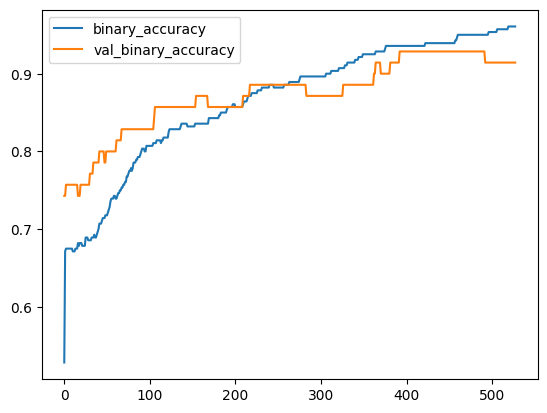

In [28]:
h_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

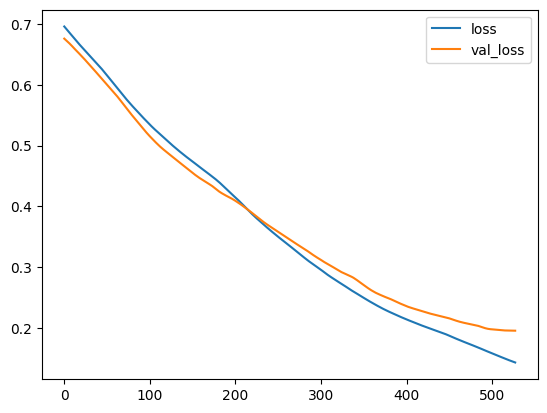

In [29]:
h_df.loc[:, ['loss', 'val_loss']].plot();

In [34]:
print(h_df['val_loss'].min(), h_df['val_binary_accuracy'].max())

0.19514980912208557 0.9285714030265808


DL Engineers if Keras And TF didn't exist: <br>
<img src='https://media.tenor.com/kq7GyBPPIj0AAAAd/sweaty-speedrunner.gif'>